In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')

In [15]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


You can safely remove it manually.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
    --------------------------------------- 0.2/9.1 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/9.1 MB 5.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/9.1 MB 5.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/9.1 MB 5.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/9.1 MB 5.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/9.1 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.1 MB 2.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.1 MB 2.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.1 MB 2.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.1 MB 2.8 MB/s eta 0:00:03
   ---- ----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.0 requires scikit-learn>=1.6.0, but you have scikit-learn 1.3.1 which is incompatible.


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
pip install --upgrade xgboost scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 682.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.6 MB 1.3 MB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.6 MB 3.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.6 MB 5.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.6 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
   ------------------------------- ------- 399.4/491.3 kB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 491.3/491.3 kB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.0 kB ? eta -:--:--
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [5]:
X = df.drop('target', axis=1)

y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.choice('n_estimators', [100, 200, 400, 600]),
        'seed': 0
    }

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),enable_categorical=True,use_label_encoder=False)
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation,
            verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [10]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 10,
                        trials = trials)

SCORE:                                                                                                                 
0.8603896103896104                                                                                                     
SCORE:                                                                                                                 
0.8603896103896104                                                                                                     
SCORE:                                                                                                                 
0.7792207792207793                                                                                                     
SCORE:                                                                                                                 
0.5292207792207793                                                                                                     
SCORE:                                  

In [11]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7198606641426617, 'gamma': 3.8786597911057497, 'max_depth': 11.0, 'min_child_weight': 1.0, 'n_estimators': 1, 'reg_alpha': 42.0, 'reg_lambda': 0.4336645171006904}


In [12]:
params={'colsample_bytree': 0.7952000816411979, 'gamma': 1.9113124584358845, 'max_depth': 17, 'min_child_weight': 6, 'n_estimators': 1, 'reg_alpha': 22, 'reg_lambda': 0.5140667298506768}

In [13]:
best_model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='mlogloss')
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7952000816411979, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=1.9113124584358845, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
best_model.fit(X_train, y_train,
            verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7952000816411979, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=1.9113124584358845, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
y_pred=best_model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy on the test Dataset: {accuracy:.2f}")

AdaBoost Accuracy on the test Dataset: 0.77


In [19]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 77  68]
 [  3 160]]


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.53      0.68       145
           1       0.70      0.98      0.82       163

    accuracy                           0.77       308
   macro avg       0.83      0.76      0.75       308
weighted avg       0.82      0.77      0.76       308



In [21]:
y_pred_proba=best_model.predict_proba(X_test)

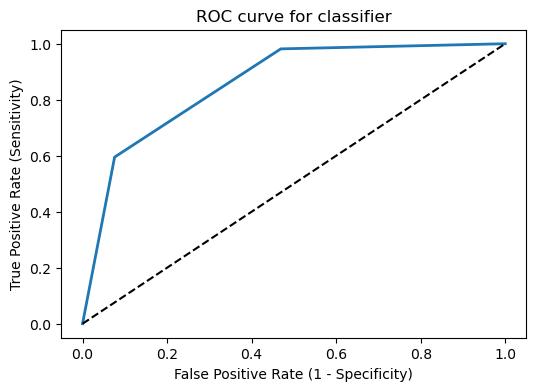

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()